In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from preprocessing_pipeline import preprocess_data, numerical_columns, categorical_columns, columns_to_drop
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Data Loading and Processing
Load the dataset and show first few rows. Preprocess using pipeline

In [8]:
# Load the dataset
file_path = './marketing_campaign.csv'
df = pd.read_csv(file_path, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
# Apply preprocessing
processed_df = preprocess_data(df, numerical_columns, categorical_columns, columns_to_drop)

# Get the fitted pipeline from the preprocess_data output.
pipeline = preprocess_data.pipeline

# Save or inspect the processed data
processed_df.to_csv("marketing_campaign_processed_with_pipeline.csv", index=False)
print("Preprocessing complete!")
print(processed_df.head())

Removed 27 income outliers.
Preprocessing complete!
     Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.294551  0.976923   1.548034         1.708066         2.452673   
1 -0.259751 -0.872804  -0.637524        -0.722217        -0.651432   
2  0.927858  0.357383   0.568301        -0.177654         1.338847   
3 -1.185531 -0.872804  -0.562160        -0.659210        -0.505357   
4  0.301836 -0.392586   0.417573        -0.218159         0.151983   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.483369      0.848775           0.358009         1.427545   
1         -0.634452     -0.733634          -0.167023        -1.127817   
2         -0.147597     -0.038918          -0.692055         1.427545   
3         -0.585766     -0.752932          -0.167023        -0.762765   
4         -0.001540     -0.559955           1.408073         0.332390   

   NumCatalogPurchases  ...  Marital_Status_Grouped_Single_Household  \
0             2.

# Find optimal value of K

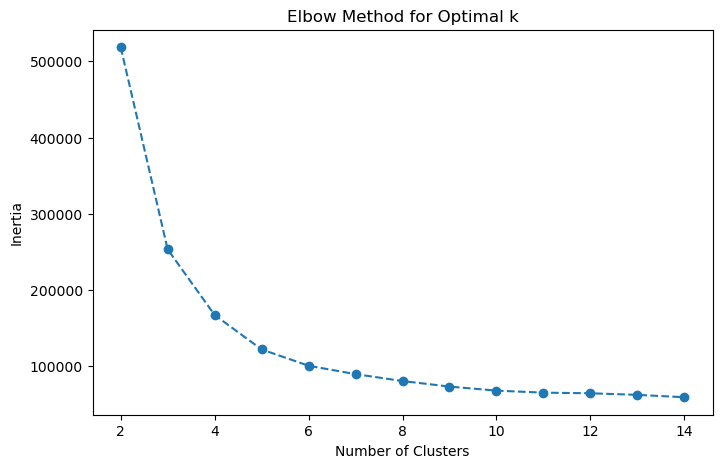

     k        inertia
0    2  518458.193858
1    3  253267.480558
2    4  167261.650939
3    5  122138.953479
4    6  100730.639746
5    7   89758.721416
6    8   80671.663451
7    9   73422.891417
8   10   68104.858812
9   11   65438.370832
10  12   64651.070033
11  13   62542.018665
12  14   59456.986305


In [10]:
inertia = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

res = pd.DataFrame({"k": K_range, "inertia": inertia})
print(res)

# Fit model with optimal value of K

In [ ]:
# Set optimal number of clusters
optimal_k = 5  

# Fit K-Means without adding "Cluster" column yet
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(processed_df)  # Store cluster labels separately

# Compute evaluation metrics before modifying processed_df
inertia = kmeans.inertia_
sil_score = silhouette_score(processed_df, cluster_labels)  
db_score = davies_bouldin_score(processed_df, cluster_labels)

# Print results
print(f"Inertia: {inertia:.4f}")  # Lower is better
print(f"Silhouette Score: {sil_score:.4f}")  # Higher is better
print(f"Davies-Bouldin Score: {db_score:.4f}")  # Lower is better

# Now add the Cluster column to processed_df
processed_df["Cluster"] = cluster_labels  

# Calculate cluster distribution
cluster_distribution = processed_df["Cluster"].value_counts().sort_index()

# Calculate percentage distribution
cluster_percentage = (cluster_distribution / len(processed_df)) * 100

# Print cluster distribution
print("\nCluster Distribution (Absolute):")
print(cluster_distribution)

print("\nCluster Distribution (Percentage):")
print(cluster_percentage)

# Save the clustered data
processed_df.to_csv("clustered_data.csv", index=False)
print("✅ Clustering complete! Results saved to clustered_data.csv.")


Inertia: 121647.2676
Silhouette Score: 0.4421
Davies-Bouldin Score: 0.7055

Cluster Distribution (Absolute):
Cluster
0    468
1    439
2    467
3    411
4    428
Name: count, dtype: int64

Cluster Distribution (Percentage):
Cluster
0    21.147763
1    19.837325
2    21.102576
3    18.572074
4    19.340262
Name: count, dtype: float64
✅ Clustering complete! Results saved to clustered_data.csv.



Cluster centroids in original scale:
         Income    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  51460.606838  301.010684  27.835470       156.585470        38.489316   
1  51913.619590  320.298405  25.674260       175.050114        37.375854   
2  51512.721627  311.573876  26.785867       163.167024        39.608137   
3  52653.683698  304.116788  25.418491       175.423358        36.445255   
4  51914.240654  289.609813  25.981308       163.504673        36.170561   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0         24.985043     44.846154           2.324786         4.126068   
1         28.416856     44.444191           2.378132         3.993166   
2         27.907923     44.406852           2.408994         4.113490   
3         27.897810     44.508516           2.238443         4.124088   
4         26.224299     41.773364           2.226636         4.088785   

   NumCatalogPurchases  ...  Marital_Status_Grouped_Single_Househo

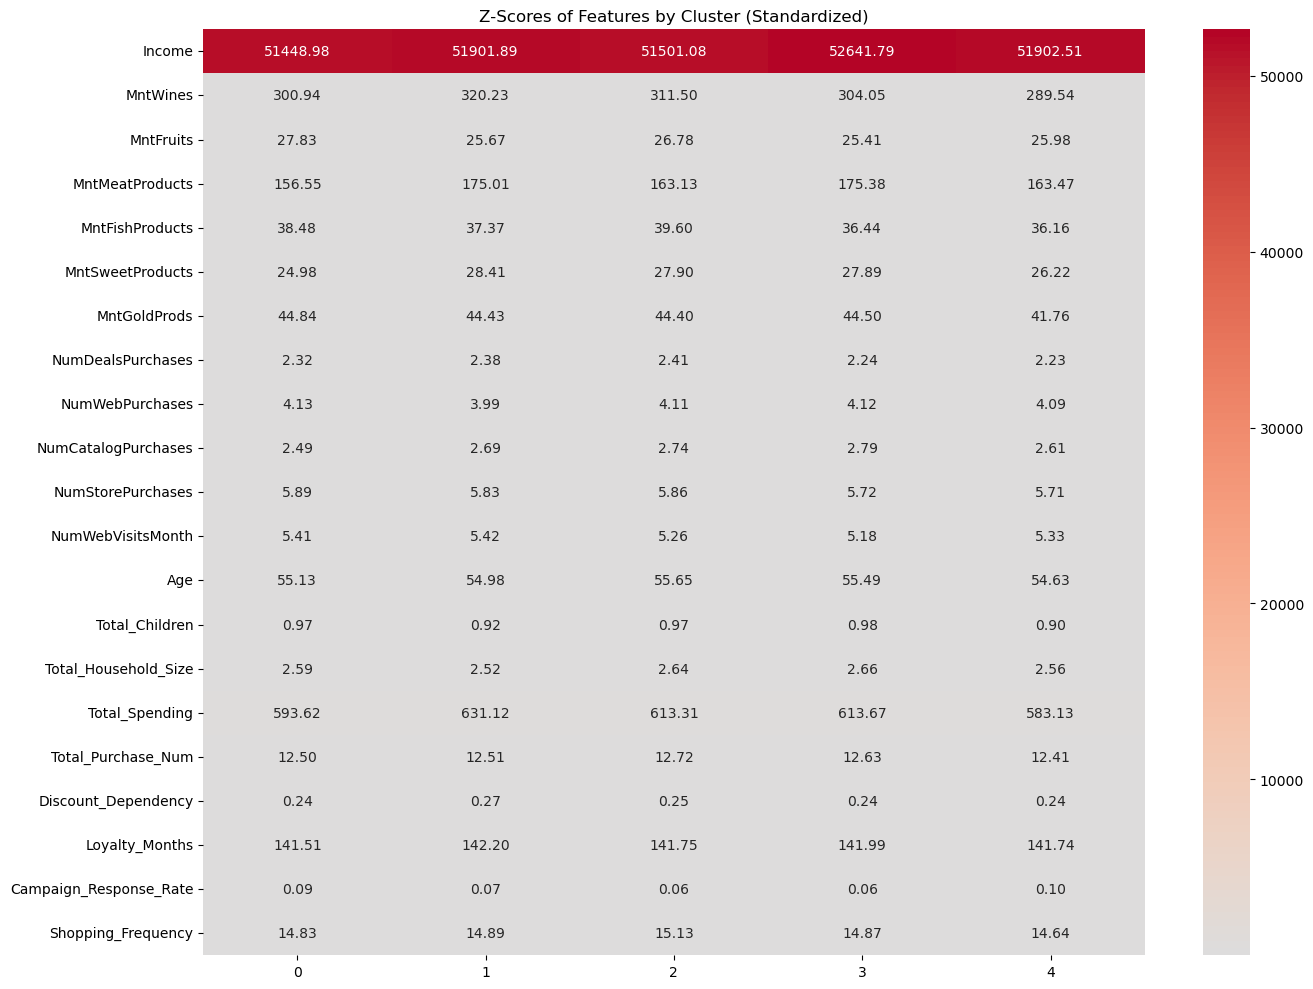

Z-Scores of features in each cluster (relative to overall mean and standard deviation):
         Income    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  51448.978636  300.942666  27.829180       156.550088        38.480619   
1  51901.889024  320.226030  25.668458       175.010559        37.367409   
2  51501.081649  311.503472  26.779815       163.130154        39.599187   
3  52641.785905  304.048069  25.412748       175.383718        36.437020   
4  51902.509948  289.544372  25.975438       163.467727        36.162388   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0         24.979397     44.836020           2.324261         4.125136   
1         28.410435     44.434149           2.377595         3.992264   
2         27.901617     44.396818           2.408449         4.112561   
3         27.891506     44.498459           2.237937         4.123156   
4         26.218373     41.763925           2.226132         4.087861   

   NumCatalogPur

In [12]:
# Get Cluster Centroids and Calculate Relative Variance
centroids_scaled = kmeans.cluster_centers_

# Retrieve the StandardScaler from the pipeline
scaler = pipeline.named_steps['preprocessing'].named_transformers_['num'].named_steps['scaler']

# Convert centroids to original scale (only for numerical features)
num_features_idx = [processed_df.columns.get_loc(col) for col in numerical_columns]
centroids_numerical_scaled = centroids_scaled[:, num_features_idx]
centroids_numerical_unscaled = scaler.inverse_transform(centroids_numerical_scaled)

# Reconstruct full centroids with unscaled numerical values
centroids_unscaled = np.copy(centroids_scaled)
centroids_unscaled[:, num_features_idx] = centroids_numerical_unscaled
centroids_df = pd.DataFrame(centroids_unscaled, columns=processed_df.columns.drop('Cluster'))

print("\nCluster centroids in original scale:")
print(centroids_df)

# Calculate the overall mean and standard deviation for each feature
overall_mean = processed_df[numerical_columns].mean() #Change is here.
overall_std = processed_df[numerical_columns].std() #Change is here.
z_scores_centroids = (centroids_df[numerical_columns] - overall_mean) / overall_std

# Display Z-Scores
print("\nZ-Scores of features in each cluster (relative to overall mean and standard deviation):")
print(z_scores_centroids)

# Visualize Z-Scores as Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(z_scores_centroids.T, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Z-Scores of Features by Cluster (Standardized)')
plt.tight_layout()
plt.show()

# Print the Z-scores DataFrame
print("Z-Scores of features in each cluster (relative to overall mean and standard deviation):")
print(z_scores_centroids)

# Conclusion: Customer Segmentation Analysis Using K-Means Clustering  
The K-Means clustering model successfully identified distinct customer segments, allowing for personalized marketing, improved retention, and better resource allocation.

## Cluster Characteristics & Insights  
Based on the cluster centroids and Z-score analysis, we can derive key insights about different customer groups:

- **Cluster 0**: High spending on Wines & Meat, low discount dependency.  
- **Cluster 1**: Moderate spenders, frequent online buyers.  
- **Cluster 2**: Balanced spending across all categories.  
- **Cluster 3**: Highest loyalty (longest customer tenure).  
- **Cluster 4**: Lowest spending, highest response to campaigns.  

## Business Implications  
Different marketing strategies can be applied based on cluster characteristics:

- **High-Spenders (Cluster 0 & 3)**: Prioritize quality over discounts. Offer premium product bundles and loyalty perks.  
- **Online Buyers (Cluster 1)**: Likely to engage in digital marketing. Target them with personalized online promotions.  
- **Balanced Consumers (Cluster 2)**: Represent the general customer base. Ensure broad promotional campaigns cater to them.  
- **Loyal Customers (Cluster 3)**: Have the longest tenure. Strengthen loyalty programs and exclusive membership offers.  
- **Price-Sensitive Customers (Cluster 4)**: Respond best to discounts. Target them with aggressive promotional offers and email campaigns.  

## Next Steps  
- **Marketing Strategy Alignment**: Tailor marketing strategies based on cluster profiles.  
- **Customer Retention**: Strengthen loyalty incentives for high-value customers.  
- **Discount Campaign Optimization**: Focus discounts on Cluster 4 to maximize engagement.  
- **Data-Driven Product Bundling**: Recommend relevant product bundles based on spending habits.  

Understanding these clusters can drive customer satisfaction, loyalty, and business revenue growth. Further analysis can focus on refining cluster characteristics and testing personalized marketing campaigns.
